# Testing the Discrete Differentiation Method

In [1]:
import crosspower as cp
import FisherCl2 as fcl
from numpy.linalg import eigh

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

/sw/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# reload any changes that have been made to crosspower.py
reload(cp)
reload(fcl.cp)
reload(fcl)

<module 'FisherCl2' from 'FisherCl2.pyc'>

# Do some testing with discrete differentiation

In [3]:
# get a Fisher Matrix object using new version FisherCl2
reload(fcl)
zmax=4
nBins=8
nz=10000
Fobj = fcl.FisherMatrix(zmax=zmax,nBins=nBins,nz=nz)

creating matter power spectrum object...
zs.size:  9998
creating more matter power objects...
creating matter power spectra for  ombh2  derivative...
zs.size:  9998
zs.size:  9998
creating matter power spectra for  omch2  derivative...
zs.size:  9998
zs.size:  9998
creating matter power spectra for  cosmomc_theta  derivative...
zs.size:  9998
zs.size:  9998
creating matter power spectra for  As  derivative...
zs.size:  9998
zs.size:  9998
creating matter power spectra for  ns  derivative...
zs.size:  9998
zs.size:  9998
creating matter power spectra for  tau  derivative...
zs.size:  9998
zs.size:  9998
creating matter power spectra for  mnu  derivative...
zs.size:  9998
zs.size:  9998
fiducial bs:  [ 1.31336283  1.66697151  2.06888487  2.48113088  2.89695688  3.31442616
  3.73278304  4.15167301]
fiducial As:  [ 1.00205877  1.00134013  1.00118993  1.00112731  1.00109399  1.00107367
  1.00106014  1.00105055]
starting cross power with entire kappa... 
starting angular cross power spectrum

In [4]:
sigmas = np.sqrt(np.diag(np.linalg.inv(Fobj.Fij)))
for paramNum in range(Fobj.nParams):
    print Fobj.paramList[paramNum],':',sigmas[paramNum]

ombh2 : 0.000604624126789
omch2 : 0.00155314762976
cosmomc_theta : 1.78161804649e-05
As : 2.16537404113e-11
ns : 0.00299054454839
tau : 1.22355881919
mnu : 0.0159371478595
bin1 : 0.0199824209983
bin2 : 0.0245806962699
bin3 : 0.031043262345
bin4 : 0.0375744646412
bin5 : 0.0429502085328
bin6 : 0.0498493534157
bin7 : 0.0563543408301
bin8 : 0.0622921567252


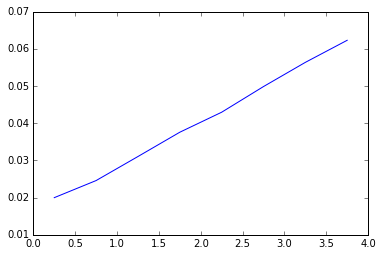

[ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75]


In [5]:
%matplotlib inline
zs = Fobj.getBinCenters()
sigmaBs = sigmas[7:]
plt.plot(zs,sigmaBs)
plt.show();
print zs

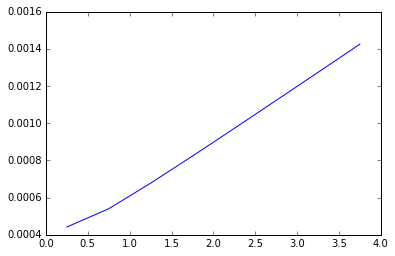

In [6]:
# why the bump?  Check just the b_i portion
sigmasBonly = np.sqrt(np.diag(np.linalg.inv(Fobj.Fij[7:,7:])))
plt.plot(zs,sigmasBonly)
plt.show();

creating matter power spectrum object...
zs.size:  998
fiducial bs:  [ 1.31336283  1.66697151  2.06888487  2.48113088  2.89695688  3.31442616
  3.73278304  4.15167301]
fiducial As:  [ 1.00205884  1.00134017  1.00118995  1.00112732  1.00109399  1.00107368
  1.00106014  1.00105056]
starting cross power with entire kappa... 
starting angular cross power spectrum  0 ,  0 ... 
window  1 : kappa  0
window  2 : kappa  0
starting angular cross power spectrum  0 ,  1 ... 
window  1 : kappa  0
window  2 : galaxies  1
starting angular cross power spectrum  0 ,  2 ... 
window  1 : kappa  0
window  2 : galaxies  2
starting angular cross power spectrum  0 ,  3 ... 
window  1 : kappa  0
window  2 : galaxies  3
starting angular cross power spectrum  0 ,  4 ... 
window  1 : kappa  0
window  2 : galaxies  4
starting angular cross power spectrum  0 ,  5 ... 
window  1 : kappa  0
window  2 : galaxies  5
starting angular cross power spectrum  0 ,  6 ... 
window  1 : kappa  0
window  2 : galaxies  6
startin

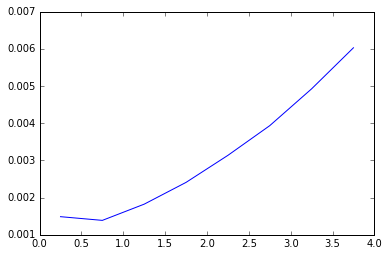

In [7]:
# why the bump?  Try with other Fcl version
import FisherCl as fcl0
Fobj0 = fcl0.FisherMatrix(zmax=4,nBins=8)
zs0 = Fobj0.getBinCenters()
sigmasA0,sigmasB0 = Fobj0.getSigmas()
plt.plot(zs0,sigmasB0)
plt.show()

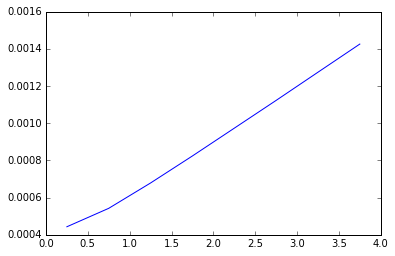

In [8]:
# Check just the b_i version
sigmasB0only = np.sqrt(np.diag(np.linalg.inv(Fobj0.Fij[8:,8:])))
plt.plot(zs,sigmasB0only)
plt.show();

In [7]:
# save and load some Fisher Matrix data
reload(fcl)
filename='myFish.npz'
fcl.saveFish(Fobj,filename=filename)
x,y,z = fcl.loadFish(filename)

dx, dy, p:  53126.9962548 2072.10129598 -0.672325680068
fid0, fid1:  0.1193 0.06
var0, var1:  omch2 mnu


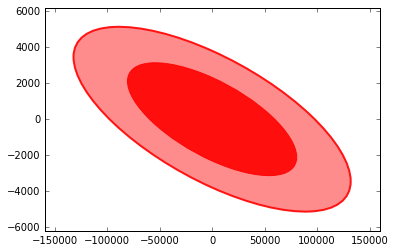

In [8]:
# plot error ellipses!
reload(fcl)
myFish = fcl.Fisher(filename)
#select parameters
p0=1
p1=6
dx,dy,p = myFish.dxdyp(p0,p1)
print 'dx, dy, p: ',dx,dy,p
print 'fid0, fid1: ',myFish.paramVals[p0],myFish.paramVals[p1]
print 'var0, var1: ',myFish.paramList[p0],myFish.paramList[p1]
myFish.twoParamConf(p0,p1)

<IPython.core.display.Javascript object>


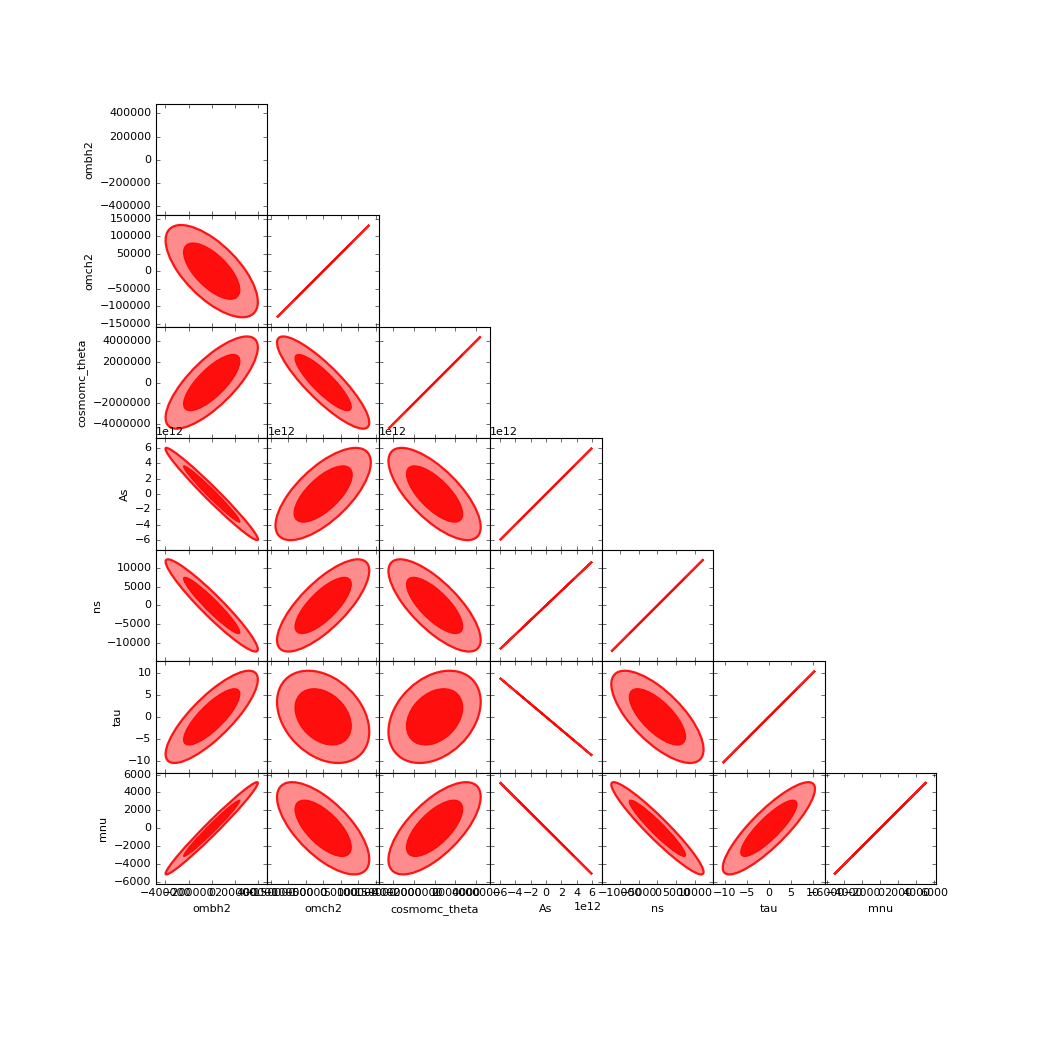

In [10]:
# try multiple plots as subplots
#f, axarr = plt.subplots(2, 2)
p0=1
p1=3
p2=6

# apparently this works better for corner plots than %matplotlib inline
%matplotlib notebook
#plt.figure(0)

nParams = 7 # arbitrary low number
f, axarr = plt.subplots(nParams,nParams,figsize=(13,13))
for i in range(nParams):
    for j in range(i+1):
        #counter = i*nParams+j+1
        #print i,j,counter
        plt.sca(axarr[i,j])
        if i != nParams-1:
            axarr[i,j].tick_params(labelbottom='off') 
        else:
            axarr[i,j].set_xlabel(myFish.paramList[j])
        if j != 0:
            axarr[i,j].tick_params(labelleft='off')
        else:
            axarr[i,j].set_ylabel(myFish.paramList[i])
        myFish.twoParamConf(j,i)
    # get rid of other boxes!
    for j in range(i+1,nParams):
        axarr[i,j].axis('off')
        
f.subplots_adjust(hspace=0)
f.subplots_adjust(wspace=0)
#plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.show()